In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import soundfile as sf
import matplotlib.pyplot as plt

from tqdm import tqdm
from pathlib import Path
from IPython.display import Audio
from natsort import natsorted
from scipy.signal import stft


import alphaMusic.evaluation as evl
import alphaMusic.utils.fls_utils as fls
import alphaMusic.utils.acu_utils as acu
import alphaMusic.utils.geo_utils as geo
import alphaMusic.utils.mat_utils as mat

from alphaMusic.dataloaders import LibriSpeechDataset


from IPython.display import Audio

In [3]:
path_to_librispeech = Path('..','data','LibriSpeech','dev-clean')
path_to_recipe = Path('..','recipes','EUSIPCO22')
print(path_to_librispeech.exists())
print(path_to_recipe.exists())

True
True


In [5]:
fs = 16000
duration_range = [6, 7]
db = LibriSpeechDataset('Librispeech', path_to_librispeech, fs, duration_range, path_to_recipe)

n_samples = 100

room_dim = [6, 5, 3]
RT60_range = [0.256, 0.512, 0.768, 1.024]
SNR_range = [10]
DRR_range = [1.]
n_srcs = 2

n_mics = 6
radius = 0.05
array_setup = acu.get_echo_array(n_mics, radius)
array_center = np.c_[[3.2, 2.1, 1.2]]

noise_type = 'cafet'
path_to_noise = Path('..','data','cafet_noise.wav')
# path_to_noise = None

def range2str(rng):
    if len(rng) > 1:
        return f'sweep'
    else:
        return str(rng[0])

rt60_name = range2str(RT60_range)
snr_name = range2str(SNR_range)
drr_name = range2str(DRR_range)
exp_name = f'N:{n_samples}_RT60:{rt60_name}_SNR:{snr_name}_nsrcs:{n_srcs}_nmics:{n_mics}_noise:{noise_type}'
print(exp_name)

path_to_output_pkl = path_to_recipe / Path(f'data/{exp_name}_data.pkl')

dataset = db.built_dataset(
    n_samples,
    room_dim, RT60_range, SNR_range, DRR_range, 
    array_setup, array_center, 
    n_srcs, path_to_noise, do_plot=False, 
    path_to_pkl=path_to_output_pkl)

dataset = db.load_dataset(path_to_output_pkl)

N:100_RT60:sweep_SNR:10_nsrcs:2_nmics:6_noise:cafet


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [10:48<00:00,  6.49s/it]


done
Saving

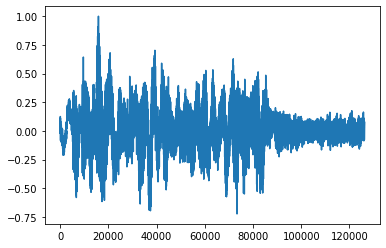

[40.0, 70.0]
{'RT60': 0.512, 'SNR': 10, 'DRR': -4.761462390424165, 'DER': 5.447365382908334}


In [6]:
(x, doas, acu_params) = dataset[0]
x = x / np.max(np.abs(x),axis=1, keepdims=True)

sf.write('mix.wav', x.T, samplerate=16000)

plt.plot(x[0])
plt.show()
print(doas)
print(acu_params)
Audio(data=x, rate=16000)

In [9]:
from pyroomacoustics import doa
from alphaMusic.alphaMUSIC import aMUSIC

nfft = 1024
fs = 16000
minF = 500
maxF = 4000
nframes = 50

kwargs = {'L': array_setup.mic_pos,
          'fs': fs, 
          'nfft': nfft,
          'azimuth': np.deg2rad(np.arange(180,step=1)),
          'num_src':n_srcs,
          
}
algorithms = {
    'MUSIC': doa.music.MUSIC(**kwargs),
    'aMUSIC_est' : aMUSIC(**kwargs,alpha=3,frequency_normalization=False),
#     'aMUSIC_fix' : aMUSIC(**kwargs,alpha=1.5,frequency_normalization=False),
#     'aMUSIC_gau' : aMUSIC(**kwargs,alpha=2,frequency_normalization=False),
#     'aMUSIC_tyl' : aMUSIC(**kwargs,alpha=0,frequency_normalization=False),
    'NormMUSIC': doa.normmusic.NormMUSIC(**kwargs),
    'aNormMUSIC_est' : aMUSIC(**kwargs,alpha=3,frequency_normalization=True),
#     'aNormMUSIC_fix' : aMUSIC(**kwargs,alpha=1.5,frequency_normalization=True),
#     'aNormMUSIC_gau' : aMUSIC(**kwargs,alpha=2,frequency_normalization=True),
#     'aNormMUSIC_tyl' : aMUSIC(**kwargs,alpha=0,frequency_normalization=True),
    'SRP_PHAT' : doa.srp.SRP(**kwargs),
#     'FRIDA' : doa.frida.FRIDA(**kwargs, max_four=4)
    
}

  0%|                                                                                           | 0/100 [00:00<?, ?it/s]

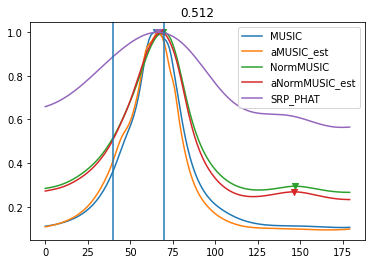

  1%|▊                                                                                  | 1/100 [00:00<00:32,  3.06it/s]

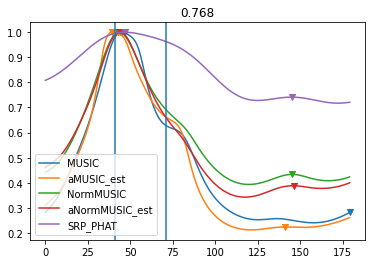

  2%|█▋                                                                                 | 2/100 [00:00<00:32,  3.03it/s]

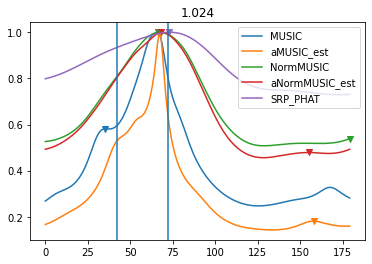

  3%|██▍                                                                                | 3/100 [00:00<00:31,  3.06it/s]

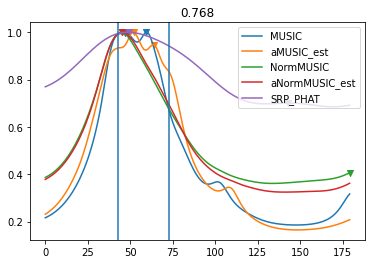

  4%|███▎                                                                               | 4/100 [00:01<00:31,  3.07it/s]

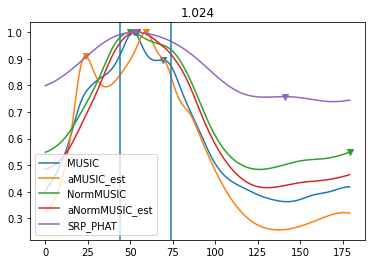

  5%|████▏                                                                              | 5/100 [00:01<00:31,  3.05it/s]

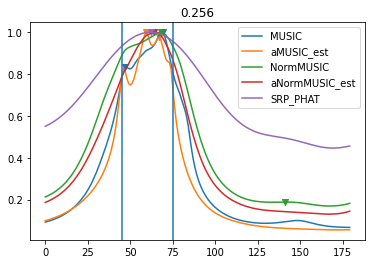

  6%|████▉                                                                              | 6/100 [00:01<00:30,  3.13it/s]

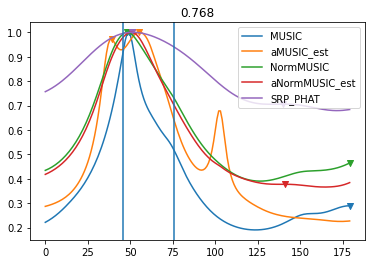

  7%|█████▊                                                                             | 7/100 [00:02<00:30,  3.07it/s]

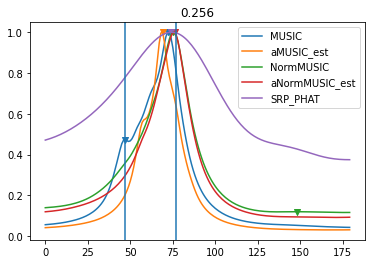

  8%|██████▋                                                                            | 8/100 [00:02<00:29,  3.14it/s]

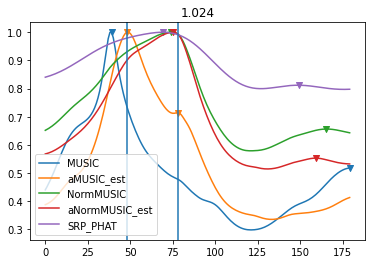

  9%|███████▍                                                                           | 9/100 [00:02<00:29,  3.10it/s]

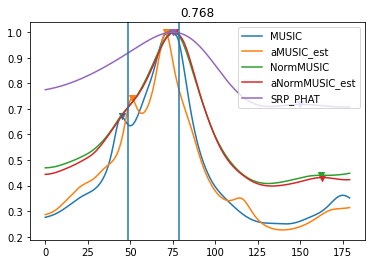

 10%|████████▏                                                                         | 10/100 [00:03<00:29,  3.08it/s]

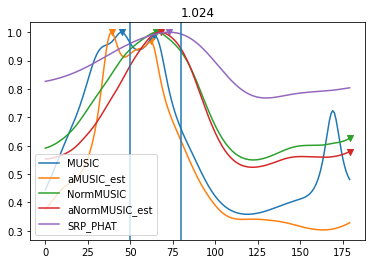

 11%|█████████                                                                         | 11/100 [00:03<00:29,  3.06it/s]

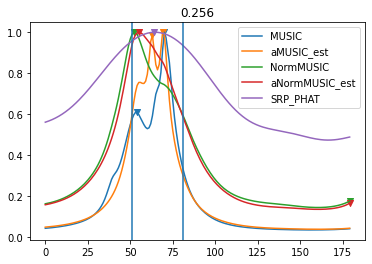

 12%|█████████▊                                                                        | 12/100 [00:03<00:28,  3.13it/s]

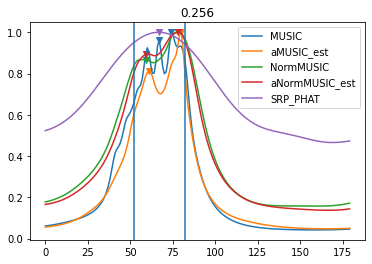

 13%|██████████▋                                                                       | 13/100 [00:04<00:27,  3.17it/s]

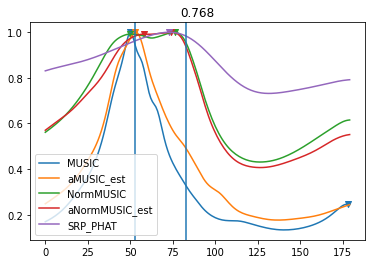

 14%|███████████▍                                                                      | 14/100 [00:04<00:27,  3.15it/s]

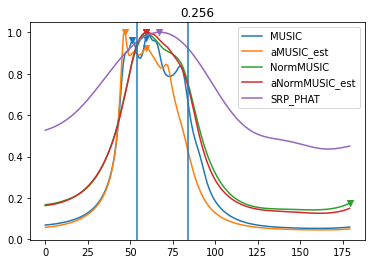

 15%|████████████▎                                                                     | 15/100 [00:04<00:26,  3.19it/s]

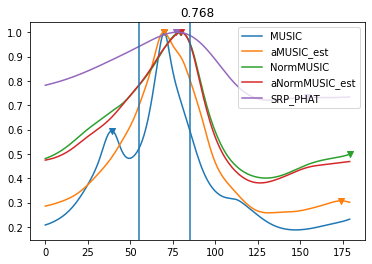

 16%|█████████████                                                                     | 16/100 [00:05<00:26,  3.13it/s]

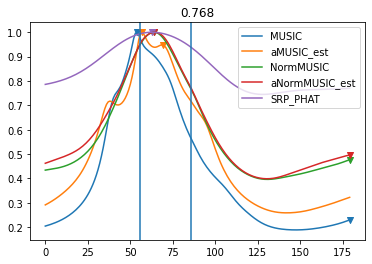

 17%|█████████████▉                                                                    | 17/100 [00:05<00:26,  3.10it/s]

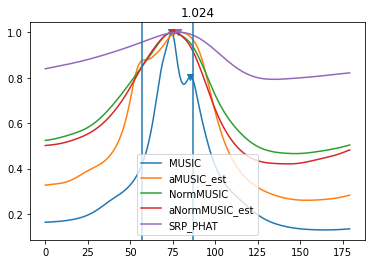

 18%|██████████████▊                                                                   | 18/100 [00:05<00:26,  3.10it/s]

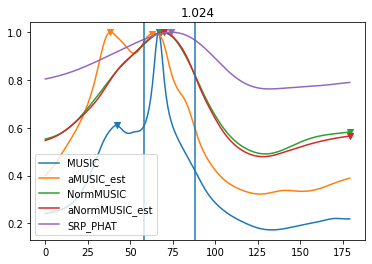

 19%|███████████████▌                                                                  | 19/100 [00:06<00:26,  3.11it/s]

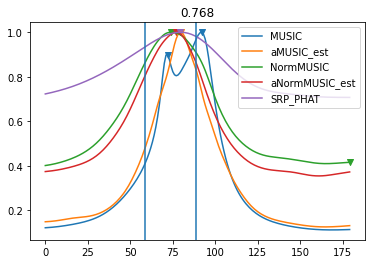

 20%|████████████████▍                                                                 | 20/100 [00:06<00:25,  3.10it/s]

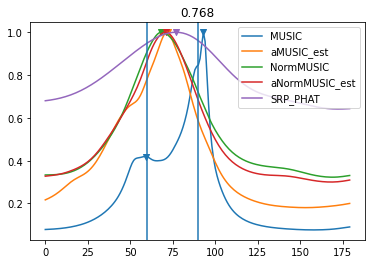

 21%|█████████████████▏                                                                | 21/100 [00:06<00:25,  3.11it/s]

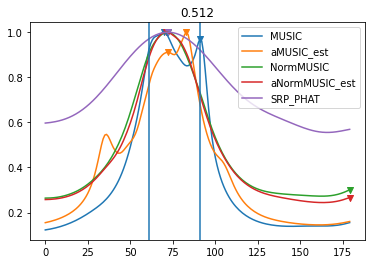

 22%|██████████████████                                                                | 22/100 [00:07<00:25,  3.10it/s]

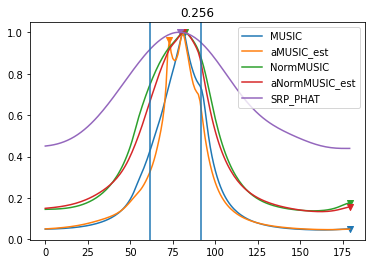

 23%|██████████████████▊                                                               | 23/100 [00:07<00:24,  3.10it/s]

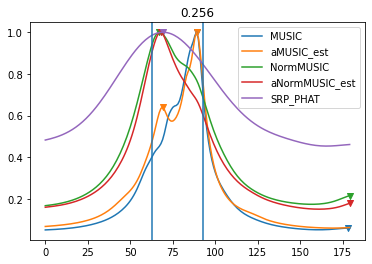

 24%|███████████████████▋                                                              | 24/100 [00:07<00:24,  3.16it/s]

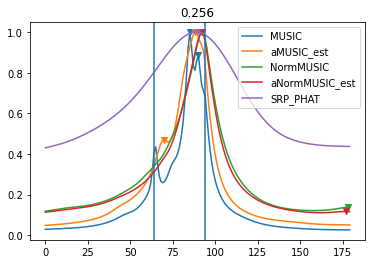

 25%|████████████████████▌                                                             | 25/100 [00:08<00:23,  3.15it/s]

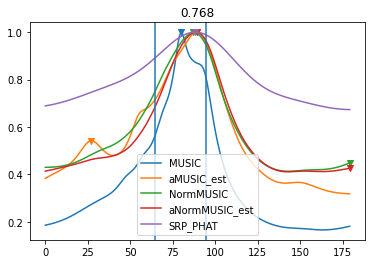

 26%|█████████████████████▎                                                            | 26/100 [00:08<00:23,  3.14it/s]

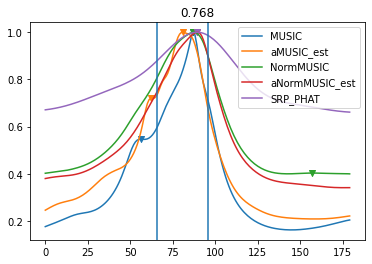

 27%|██████████████████████▏                                                           | 27/100 [00:08<00:23,  3.14it/s]

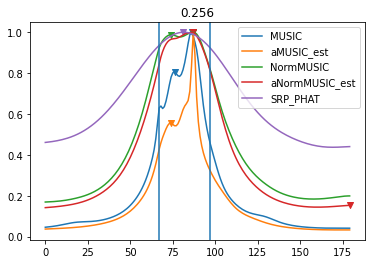

 28%|██████████████████████▉                                                           | 28/100 [00:08<00:23,  3.12it/s]

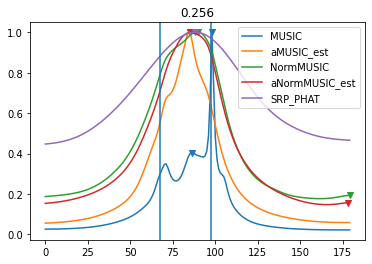

 29%|███████████████████████▊                                                          | 29/100 [00:09<00:22,  3.12it/s]

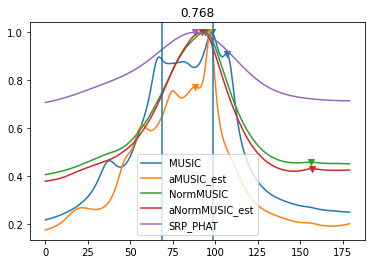

 30%|████████████████████████▌                                                         | 30/100 [00:09<00:28,  2.48it/s]

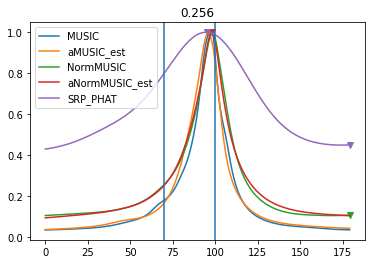

 31%|█████████████████████████▍                                                        | 31/100 [00:10<00:26,  2.64it/s]

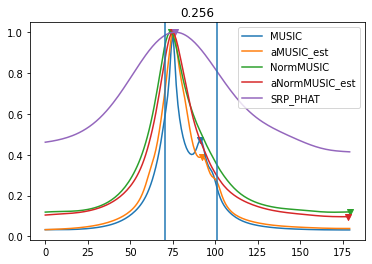

 32%|██████████████████████████▏                                                       | 32/100 [00:10<00:24,  2.76it/s]

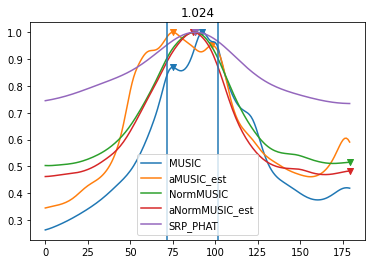

 33%|███████████████████████████                                                       | 33/100 [00:10<00:23,  2.84it/s]

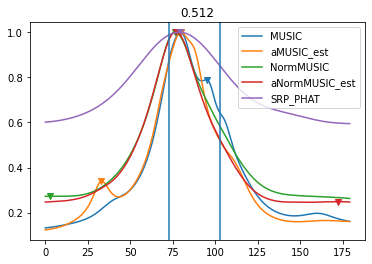

 34%|███████████████████████████▉                                                      | 34/100 [00:11<00:22,  2.93it/s]

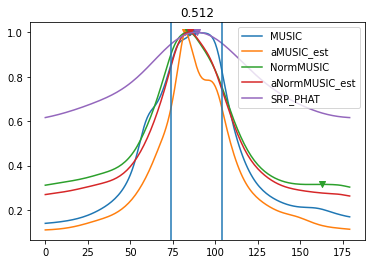

 35%|████████████████████████████▋                                                     | 35/100 [00:11<00:21,  2.99it/s]

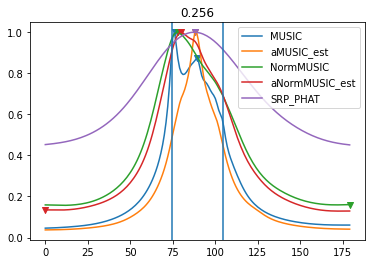

 36%|█████████████████████████████▌                                                    | 36/100 [00:11<00:21,  3.02it/s]

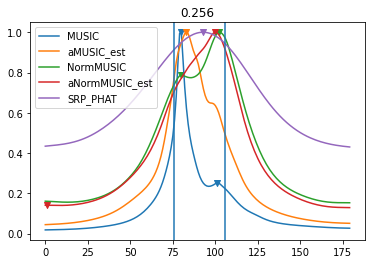

 37%|██████████████████████████████▎                                                   | 37/100 [00:12<00:20,  3.04it/s]

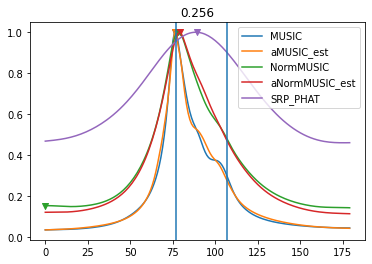

 38%|███████████████████████████████▏                                                  | 38/100 [00:12<00:20,  3.05it/s]

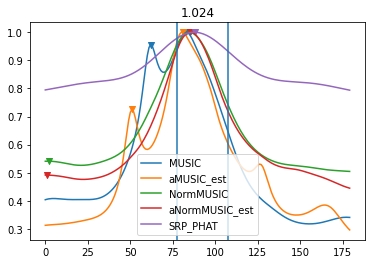

 39%|███████████████████████████████▉                                                  | 39/100 [00:12<00:19,  3.05it/s]

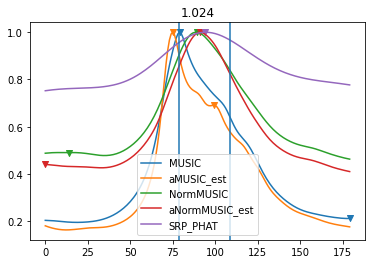

 40%|████████████████████████████████▊                                                 | 40/100 [00:13<00:19,  3.08it/s]

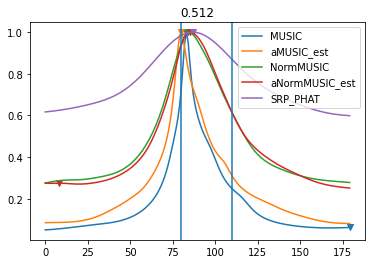

 41%|█████████████████████████████████▌                                                | 41/100 [00:13<00:19,  3.10it/s]

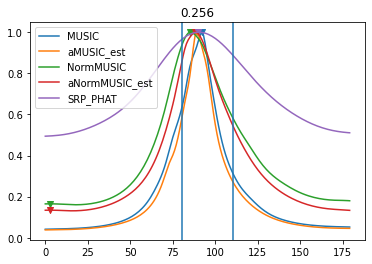

 42%|██████████████████████████████████▍                                               | 42/100 [00:13<00:18,  3.11it/s]

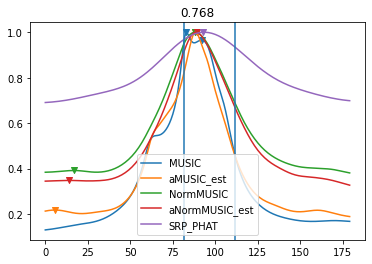

 43%|███████████████████████████████████▎                                              | 43/100 [00:14<00:18,  3.12it/s]

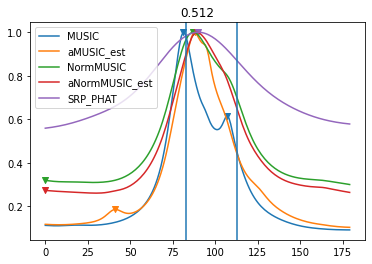

 44%|████████████████████████████████████                                              | 44/100 [00:14<00:17,  3.13it/s]

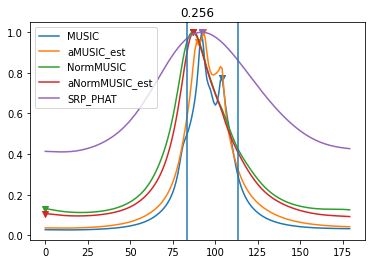

 45%|████████████████████████████████████▉                                             | 45/100 [00:14<00:17,  3.12it/s]

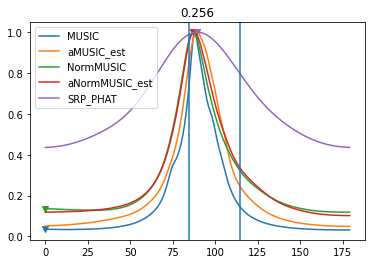

 46%|█████████████████████████████████████▋                                            | 46/100 [00:15<00:17,  3.13it/s]

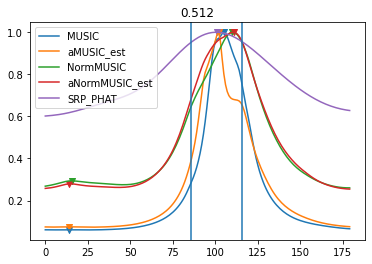

 47%|██████████████████████████████████████▌                                           | 47/100 [00:15<00:16,  3.13it/s]

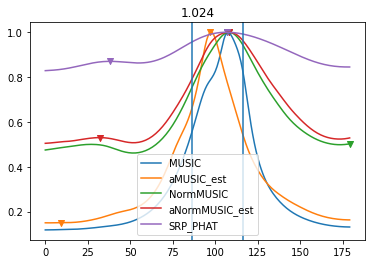

 48%|███████████████████████████████████████▎                                          | 48/100 [00:15<00:16,  3.13it/s]

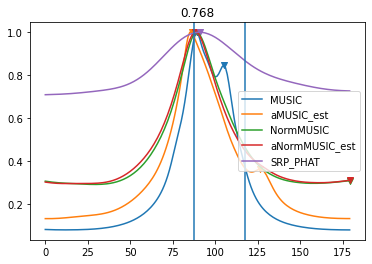

 49%|████████████████████████████████████████▏                                         | 49/100 [00:16<00:16,  3.14it/s]

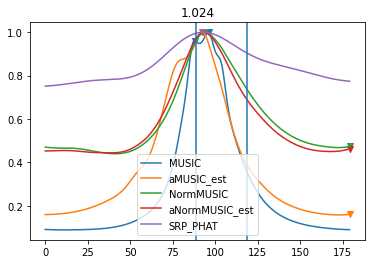

 50%|█████████████████████████████████████████                                         | 50/100 [00:16<00:15,  3.14it/s]

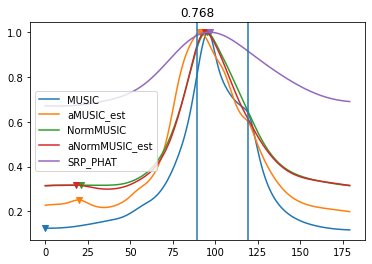

 51%|█████████████████████████████████████████▊                                        | 51/100 [00:16<00:15,  3.15it/s]

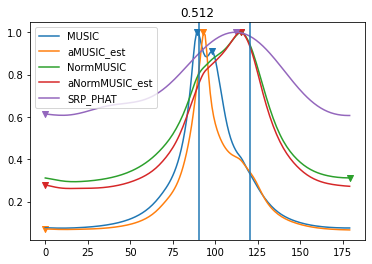

 52%|██████████████████████████████████████████▋                                       | 52/100 [00:16<00:15,  3.14it/s]

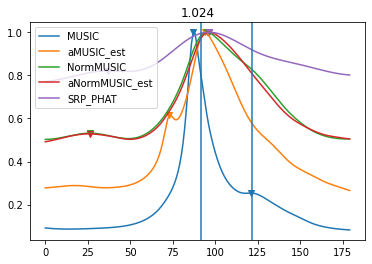

 53%|███████████████████████████████████████████▍                                      | 53/100 [00:17<00:15,  3.13it/s]

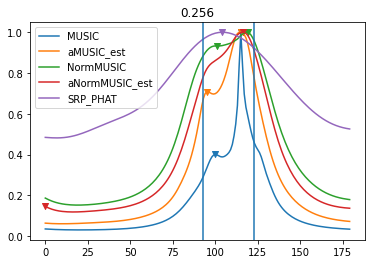

 54%|████████████████████████████████████████████▎                                     | 54/100 [00:17<00:14,  3.12it/s]

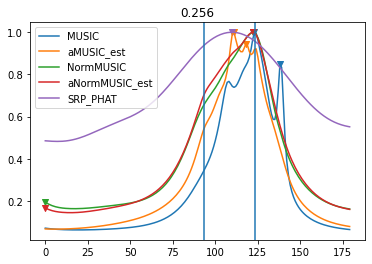

 55%|█████████████████████████████████████████████                                     | 55/100 [00:17<00:14,  3.13it/s]

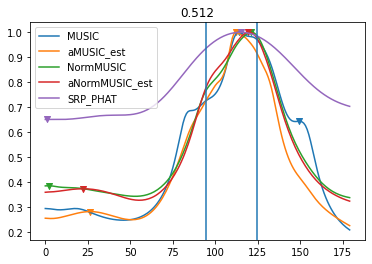

 56%|█████████████████████████████████████████████▉                                    | 56/100 [00:18<00:14,  3.11it/s]

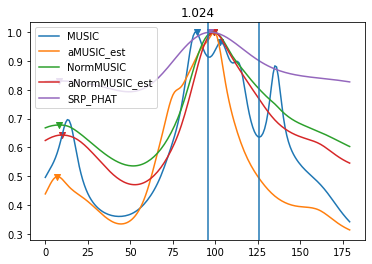

 57%|██████████████████████████████████████████████▋                                   | 57/100 [00:18<00:13,  3.10it/s]

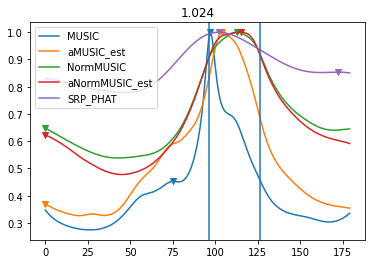

 58%|███████████████████████████████████████████████▌                                  | 58/100 [00:18<00:13,  3.10it/s]

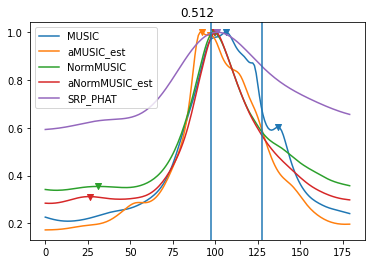

 59%|████████████████████████████████████████████████▍                                 | 59/100 [00:19<00:13,  3.11it/s]

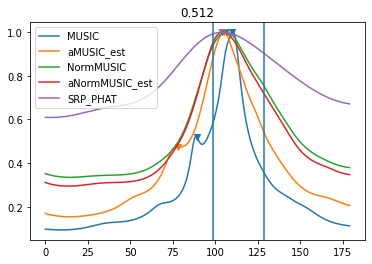

 60%|█████████████████████████████████████████████████▏                                | 60/100 [00:19<00:12,  3.12it/s]

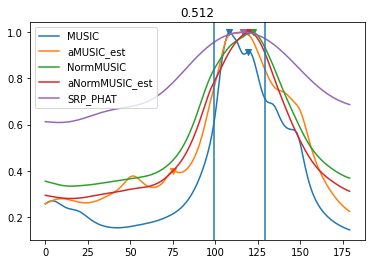

 61%|██████████████████████████████████████████████████                                | 61/100 [00:20<00:15,  2.56it/s]

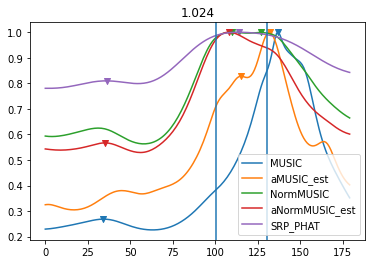

 62%|██████████████████████████████████████████████████▊                               | 62/100 [00:20<00:14,  2.69it/s]

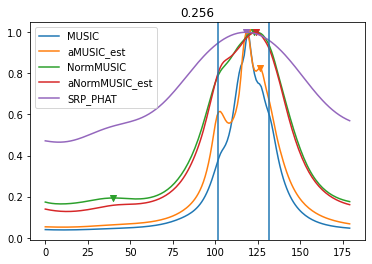

 63%|███████████████████████████████████████████████████▋                              | 63/100 [00:20<00:13,  2.84it/s]

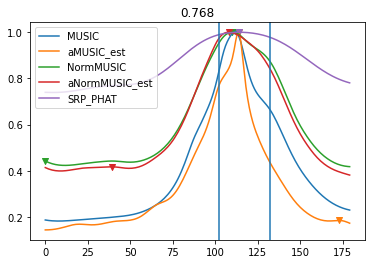

 64%|████████████████████████████████████████████████████▍                             | 64/100 [00:21<00:12,  2.92it/s]

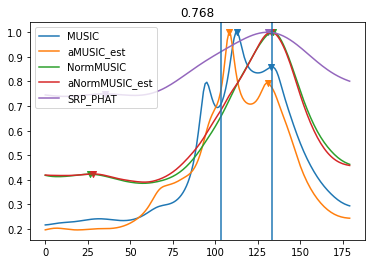

 65%|█████████████████████████████████████████████████████▎                            | 65/100 [00:21<00:11,  2.95it/s]

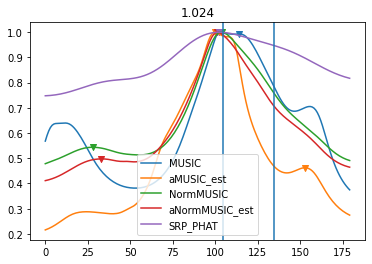

 66%|██████████████████████████████████████████████████████                            | 66/100 [00:21<00:11,  2.98it/s]

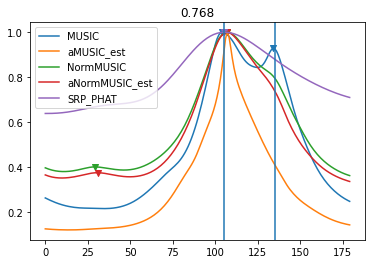

 67%|██████████████████████████████████████████████████████▉                           | 67/100 [00:22<00:10,  3.03it/s]

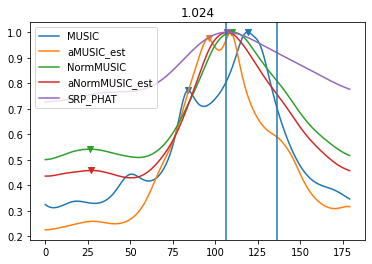

 68%|███████████████████████████████████████████████████████▊                          | 68/100 [00:22<00:10,  3.02it/s]

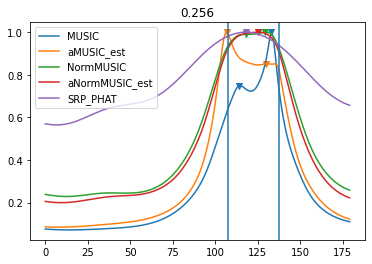

 69%|████████████████████████████████████████████████████████▌                         | 69/100 [00:22<00:10,  3.06it/s]

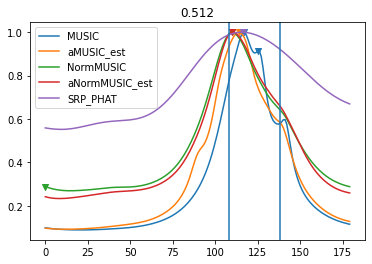

 70%|█████████████████████████████████████████████████████████▍                        | 70/100 [00:22<00:09,  3.13it/s]

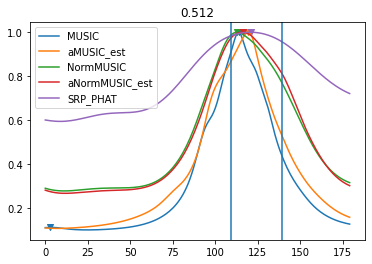

 71%|██████████████████████████████████████████████████████████▏                       | 71/100 [00:23<00:09,  3.14it/s]

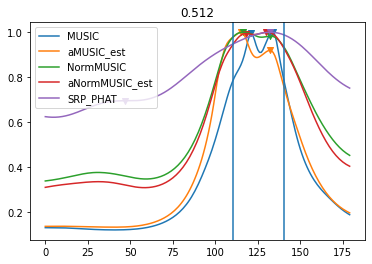

 72%|███████████████████████████████████████████████████████████                       | 72/100 [00:23<00:08,  3.15it/s]

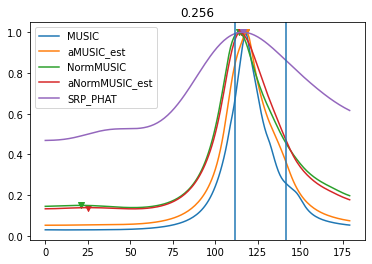

 73%|███████████████████████████████████████████████████████████▊                      | 73/100 [00:23<00:08,  3.18it/s]

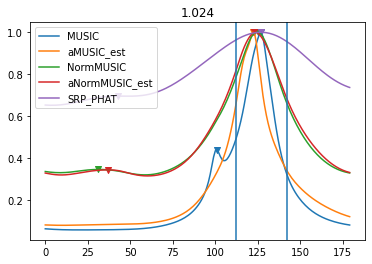

 74%|████████████████████████████████████████████████████████████▋                     | 74/100 [00:24<00:08,  3.18it/s]

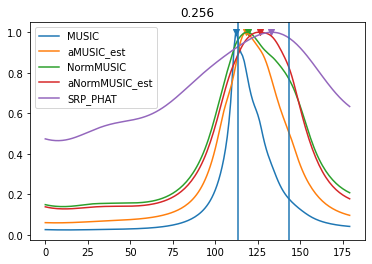

 75%|█████████████████████████████████████████████████████████████▌                    | 75/100 [00:24<00:07,  3.20it/s]

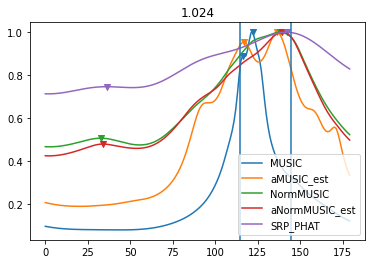

 76%|██████████████████████████████████████████████████████████████▎                   | 76/100 [00:24<00:07,  3.17it/s]

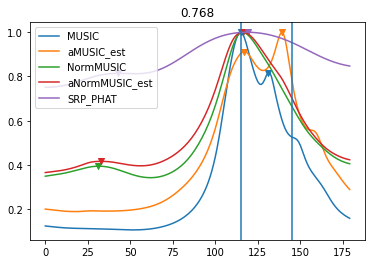

 77%|███████████████████████████████████████████████████████████████▏                  | 77/100 [00:25<00:07,  3.15it/s]

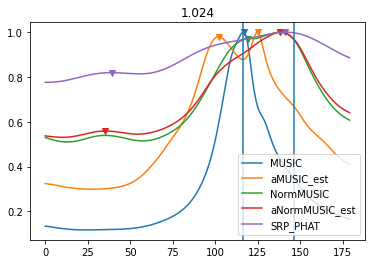

 78%|███████████████████████████████████████████████████████████████▉                  | 78/100 [00:25<00:06,  3.15it/s]

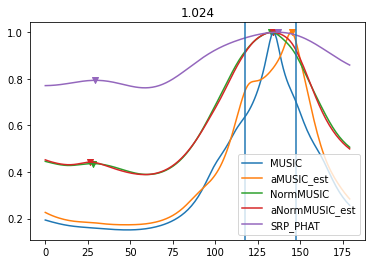

 79%|████████████████████████████████████████████████████████████████▊                 | 79/100 [00:25<00:06,  3.14it/s]

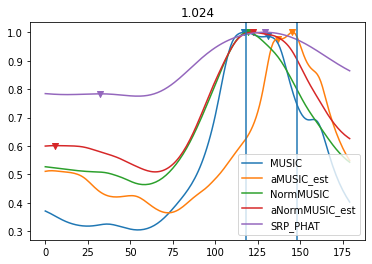

 80%|█████████████████████████████████████████████████████████████████▌                | 80/100 [00:26<00:06,  3.11it/s]

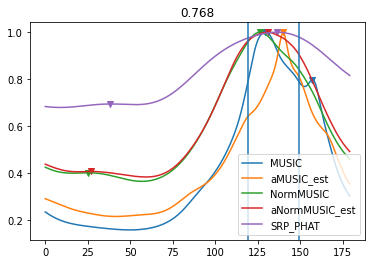

 81%|██████████████████████████████████████████████████████████████████▍               | 81/100 [00:26<00:06,  3.12it/s]

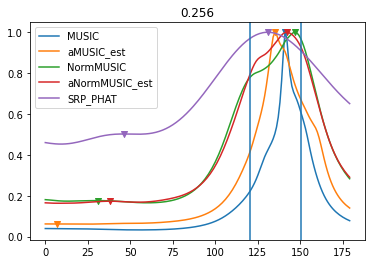

 82%|███████████████████████████████████████████████████████████████████▏              | 82/100 [00:26<00:05,  3.16it/s]

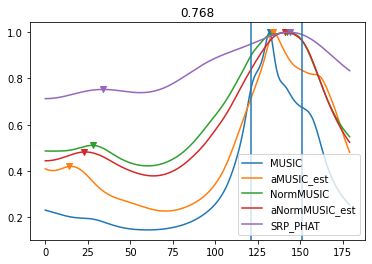

 83%|████████████████████████████████████████████████████████████████████              | 83/100 [00:27<00:05,  3.14it/s]

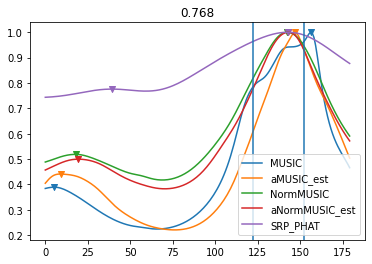

 84%|████████████████████████████████████████████████████████████████████▉             | 84/100 [00:27<00:05,  3.10it/s]

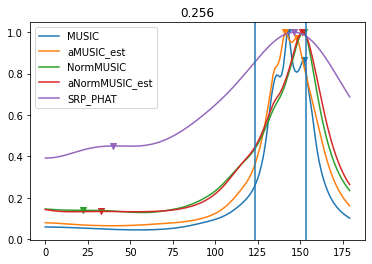

 85%|█████████████████████████████████████████████████████████████████████▋            | 85/100 [00:27<00:04,  3.15it/s]

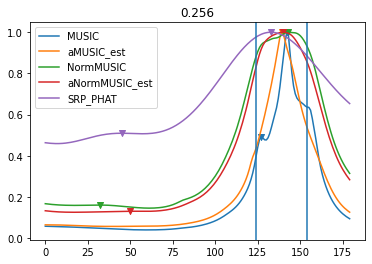

 86%|██████████████████████████████████████████████████████████████████████▌           | 86/100 [00:28<00:04,  3.16it/s]

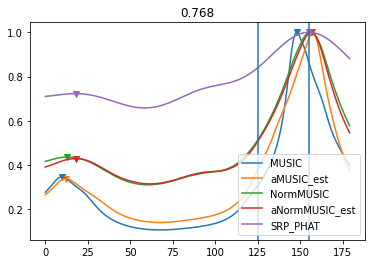

 87%|███████████████████████████████████████████████████████████████████████▎          | 87/100 [00:28<00:04,  3.14it/s]

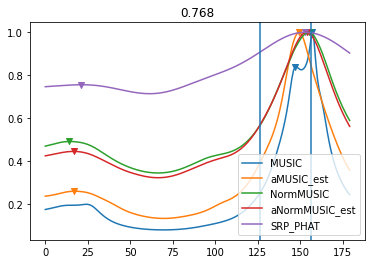

 88%|████████████████████████████████████████████████████████████████████████▏         | 88/100 [00:28<00:03,  3.12it/s]

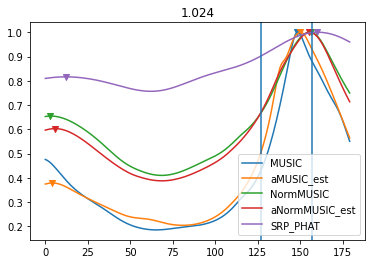

 89%|████████████████████████████████████████████████████████████████████████▉         | 89/100 [00:29<00:03,  3.09it/s]

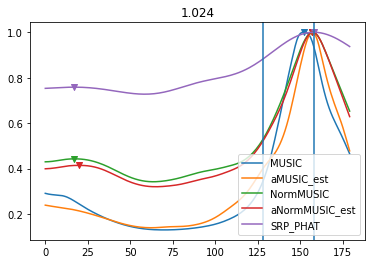

 90%|█████████████████████████████████████████████████████████████████████████▊        | 90/100 [00:29<00:03,  3.10it/s]

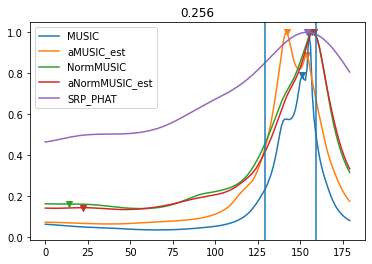

 91%|██████████████████████████████████████████████████████████████████████████▌       | 91/100 [00:29<00:02,  3.14it/s]

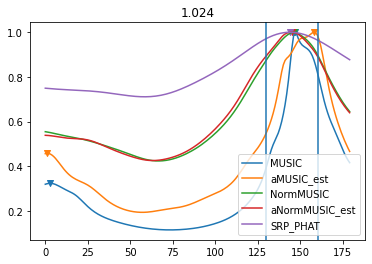

 92%|███████████████████████████████████████████████████████████████████████████▍      | 92/100 [00:30<00:03,  2.47it/s]

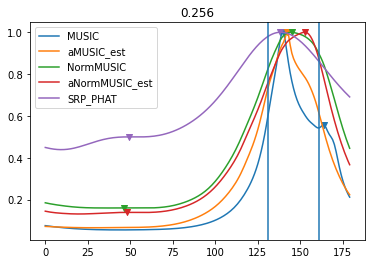

 93%|████████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:30<00:02,  2.65it/s]

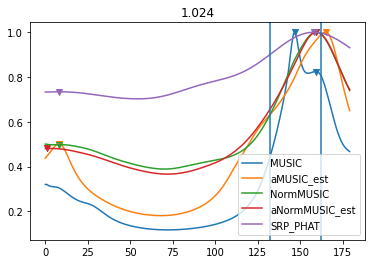

 94%|█████████████████████████████████████████████████████████████████████████████     | 94/100 [00:30<00:02,  2.76it/s]

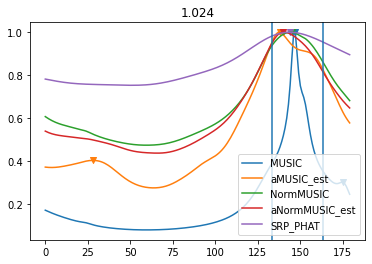

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 95/100 [00:31<00:01,  2.83it/s]

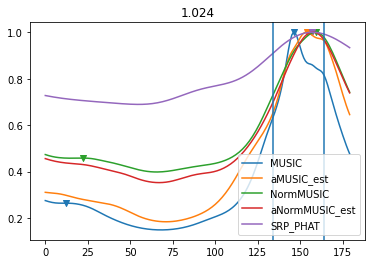

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 96/100 [00:31<00:01,  2.88it/s]

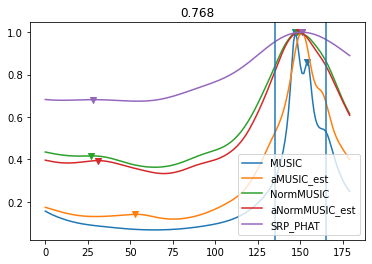

 97%|███████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:31<00:01,  2.92it/s]

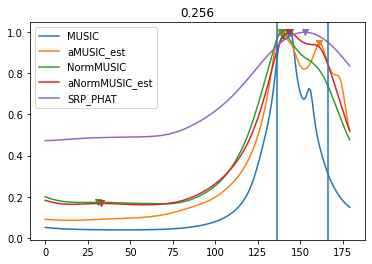

 98%|████████████████████████████████████████████████████████████████████████████████▎ | 98/100 [00:32<00:00,  2.98it/s]

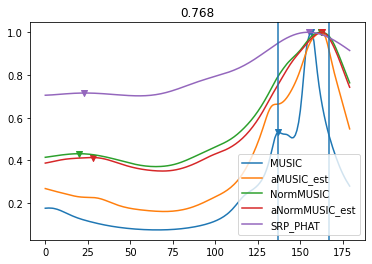

 99%|█████████████████████████████████████████████████████████████████████████████████▏| 99/100 [00:32<00:00,  2.98it/s]

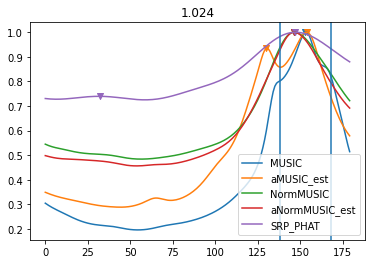

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.04it/s]


In [10]:
columns = ["DOAs", 'algo', "DOAs_est", 'SNR', 'RT60','DRR', 'SingularMatrix']
predictions = {n:[] for n in columns}

for n, (x, doas, acu_params) in enumerate(tqdm(dataset)):

    # STFT
    stft_signals = stft(x[:,fs:fs+nframes*nfft], fs=fs, nperseg=nfft, noverlap=0.5)[2]
    
    # OUR MUSIC
    for algo_name, algo in algorithms.items():
             
        predictions['DOAs'].append(doas)
        predictions['algo'].append(algo_name)
    
#         try:
        algo.locate_sources(stft_signals, num_src=n_srcs, freq_range=[minF, maxF])
        predictions['SingularMatrix'].append(False)
        doa_est = np.rad2deg(algo.azimuth_recon)
            
#         except Exception as e:
#             if str(e) == 'Matrix is singular.':
#                 predictions['SingularMatrix'].append(True)
#                 doa_est = np.NaN
        
        
        x = np.rad2deg(algo.grid.azimuth)
        y = algo.grid.values / np.max(algo.grid.values)
        plt.plot(x, y, label=algo_name)
        
        x = [int(d) for d in doa_est]
        plt.scatter(x, y[x], marker='v')

        predictions['DOAs_est'].append(doa_est)
        predictions['SNR'].append(acu_params['SNR'])
        predictions['RT60'].append(acu_params['RT60'])
        predictions['DRR'].append(acu_params['DRR'])
    
    for doa in doas:
        plt.axvline(x=doa)
    plt.title(acu_params['RT60'])
    plt.legend()
    plt.show()
    

df_predictions = pd.DataFrame.from_dict(predictions)

In [11]:
fls.save_to_pkl(path_to_recipe / Path(f'{exp_name}_results.pkl'), df_predictions)

In [12]:
df = pd.DataFrame()

for r, row in df_predictions.iterrows():
    
    # compute metrics
    doas_est = row['DOAs_est']
    doas_ref = row['DOAs']
    
    metrics = evl.compute_ssl_metrics(doas_est, doas_ref)
    
    df.at[r,'algo'] = row['algo']
#     print([int(d) for d in doas_ref], row['algo'], [int(d) for d in doas_est])
    
    # params
#     df.at[r,'nsrcs'] =  res_dict['nsrcs']
#     df.at[r,'SNR'] = res_dict['acu_params']['SNR']
#     df.at[r,'RT60'] = res_dict['acu_params']['RT60']
#     df.at[r,'DRR'] =  res_dict['acu_params']['DRR']
    
    
    # metrics
    df.at[r,'MAE'] = metrics['MAE']
    df.at[r,'RMSE'] = metrics['RMSE']
    df.at[r,'ACC5'] = metrics['ACC5']
    df.at[r,'ACC10'] = metrics['ACC10']
    df.at[r,'MISS'] = metrics['MISS']
    df.at[r,'SNR'] = row['SNR']
    df.at[r,'RT60'] = row['RT60']
    
#     df.at[r,'est'] = np.array(doas_est)
#     df.at[r,'ref'] = np.array(doas_ref)

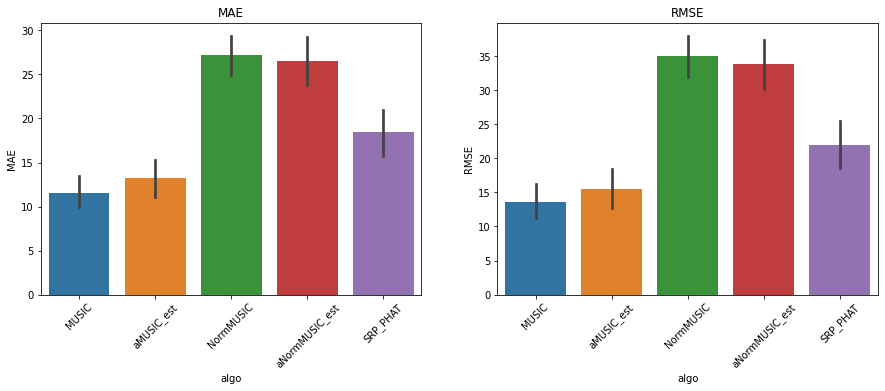

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('MAE')
sns.barplot(x='algo', y='MAE', data=df)
plt.xticks(rotation=45)
plt.subplot(122)
plt.title('RMSE')
sns.barplot(x='algo', y='RMSE', data=df)
plt.xticks(rotation=45)
plt.show()

In [14]:
for rt60 in RT60_range:
    for algo_name, algo in algorithms.items():
        
        curr_df = df.loc[(df['algo'] == algo_name) & (df['RT60'] == rt60)]
        mean = np.mean(curr_df['RMSE'].to_numpy())
        std  = np.std(curr_df['RMSE'].to_numpy())

        print(rt60, algo_name, mean, std)

0.256 MUSIC 10.942673733991935 11.962241354280964
0.256 aMUSIC_est 8.630707842637527 4.799188348221161
0.256 NormMUSIC 36.581941627027014 16.132489169275406
0.256 aNormMUSIC_est 32.45571611457036 19.335558387517146
0.256 SRP_PHAT 16.743786011735303 15.21357803607961
0.512 MUSIC 16.116909244276663 14.850770902944715
0.512 aMUSIC_est 18.945707027939452 16.60555163827705
0.512 NormMUSIC 31.604306019739987 18.761165591294162
0.512 aNormMUSIC_est 32.155466302325436 20.537676277515274
0.512 SRP_PHAT 15.71416223980992 13.955139976639387
0.768 MUSIC 15.199092430375545 11.99894486004662
0.768 aMUSIC_est 19.913630775483966 16.947264747286532
0.768 NormMUSIC 37.55975420939508 11.909628872625493
0.768 aNormMUSIC_est 34.38844911734021 16.386794695150922
0.768 SRP_PHAT 27.22177042183409 18.896967494430797
1.024 MUSIC 13.730371994151914 11.445791520157025
1.024 aMUSIC_est 17.051332382782842 14.062285529624575
1.024 NormMUSIC 32.77046772430614 16.397208981152527
1.024 aNormMUSIC_est 35.6893620724302 1

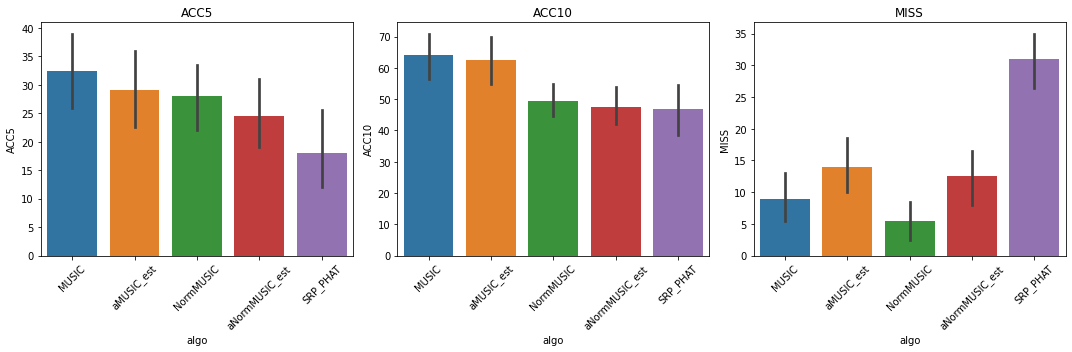

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('ACC5')
sns.barplot(x='algo', y='ACC5', data=df)
plt.xticks(rotation=45)
plt.subplot(132)
plt.title('ACC10')
sns.barplot(x='algo', y='ACC10', data=df)
plt.xticks(rotation=45)
plt.subplot(133)
plt.title('MISS')
sns.barplot(x='algo', y='MISS', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='RT60', ylabel='RMSE'>

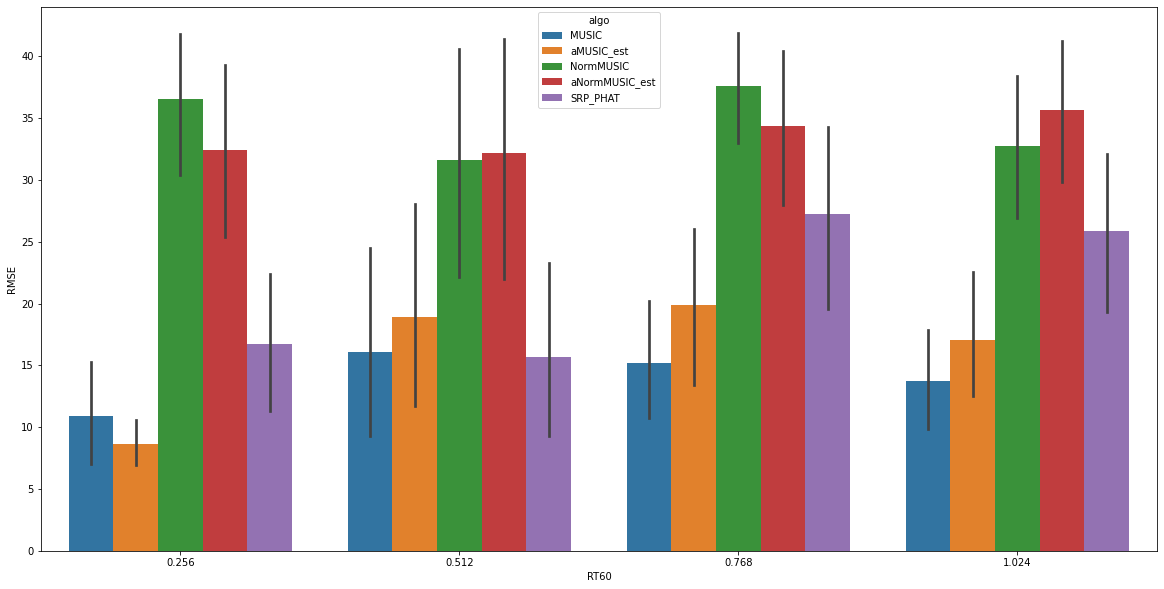

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x='RT60',y='RMSE',hue='algo',data=df)

<AxesSubplot:xlabel='RT60', ylabel='ACC5'>

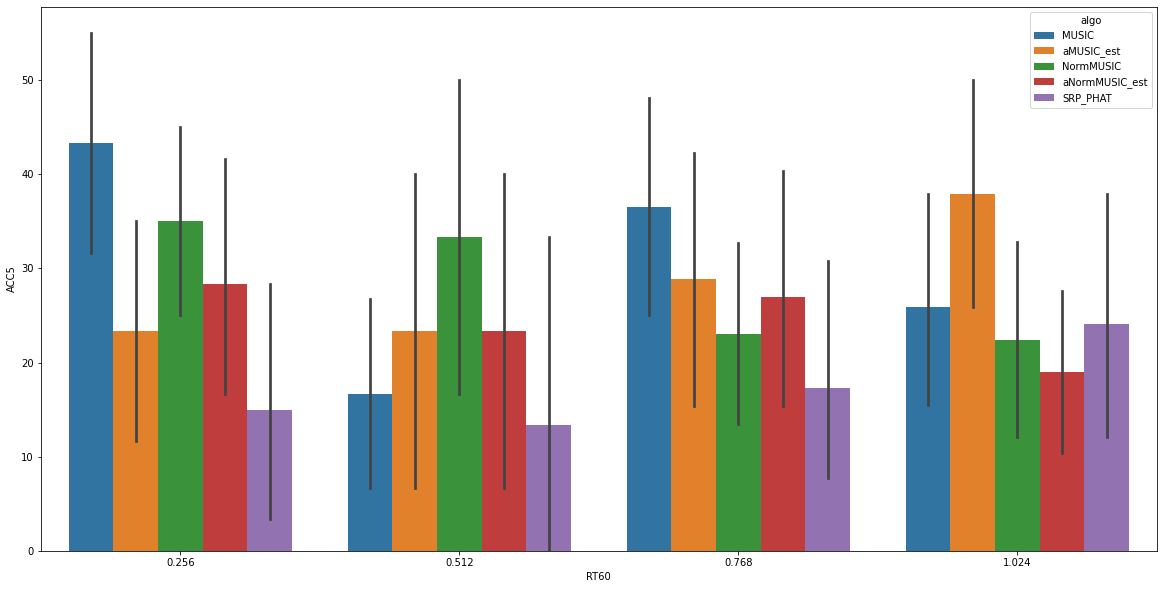

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x='RT60',y='ACC5',hue='algo',data=df)

<AxesSubplot:xlabel='RT60', ylabel='ACC10'>

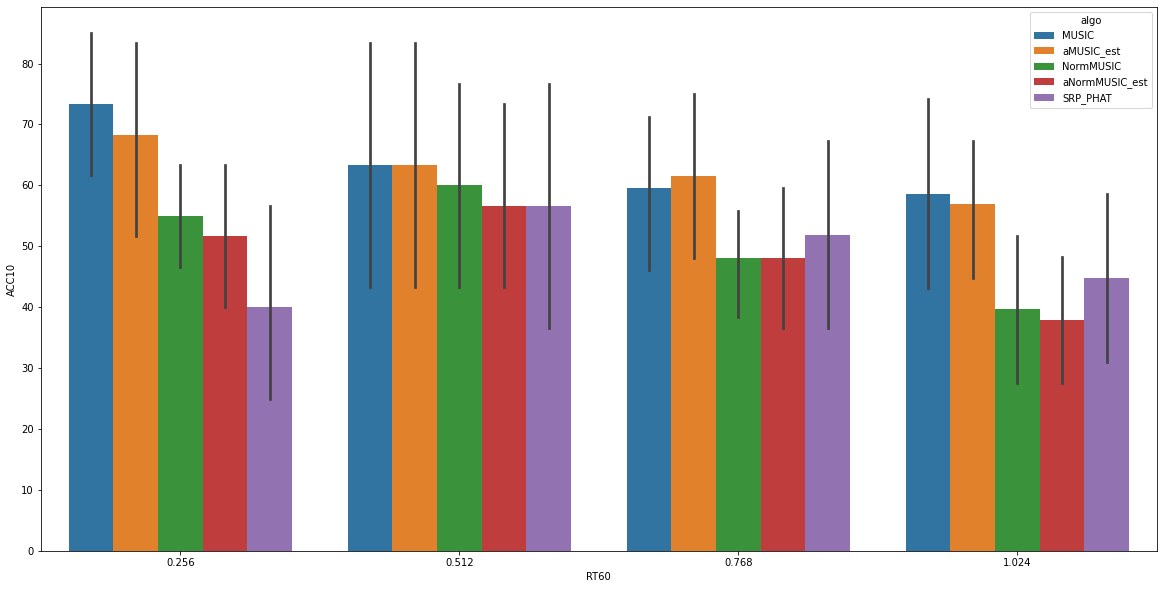

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(x='RT60',y='ACC10',hue='algo',data=df)